<u>QF600 Assignment 2</u><br>
Name: Gabriel Tan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

In [2]:
industryData = pd.read_excel("Industry_Portfolios.xlsx")
mktData = pd.read_excel("Market_Portfolio.xlsx")

/Users/gab/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
industryData.head()

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
1,200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
2,200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
3,200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
4,200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86


In [4]:
mktData.head()

,Date,Market
0,200401,2.22
1,200402,1.46
2,200403,-1.23
3,200404,-1.75
4,200405,1.23


***Regress the monthly excess returns for each of the ten industry portfolios on the monthly excess returns for the market portfolio, so as to estimate the intercept coefficient (α) and slope coefficient (β) for each of the ten industry portfolios.***

***Q: Create a table showing the intercept and slope coefficients for the ten industry portfolios***

In [5]:
#calculating excess returns for the different datas
industryData2 = industryData.copy()
industryData2.iloc[:,1:] = industryData2.iloc[:,1:].apply(lambda x: x - float(0.13))

mktData2 = mktData.copy()
mktData2.iloc[:,1] = mktData2.iloc[:,1].apply(lambda x: x - float(0.13))


In [6]:
#Regressing and creating table to show intercept and slope
regressionList = []
x = mktData2['Market']
x = sm.add_constant(x)
for temp in industryData2.columns:
    if ( temp != 'Date'):
        y  = industryData2[str(temp)]      
        result = sm.OLS(y, x).fit()
        tempIntercept = result.params['const']
        tempSlope = result.params['Market']
        regressionList.append([str(temp),tempIntercept,tempSlope])

regressionDf = pd.DataFrame(data = regressionList, columns = ['Industry','Intercept','Slope'])
regressionDf

/Users/gab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Industry,Intercept,Slope
0,NoDur,0.369443,0.652647
1,Durbl,-0.415599,1.648536
2,Manuf,0.159771,1.169846
3,Enrgy,0.501719,0.969850
4,HiTec,-0.064020,1.132969
5,Telcm,0.194691,0.900729
6,Shops,0.275492,0.826492
7,Hlth,0.237841,0.673036
8,Utils,0.444585,0.538086
9,Other,-0.387135,1.207309


***Q: Briefly explain the economic significance of the intercept and slope coefficients***

<u>Answer</u><br>
The intercept shows a "pricing error" for the individual assets or passive portfolios which is the difference between the expected excess return on the security/passive porfolio and the actual return. The slope coefficient shows the portfolio's estimated exposure to the systematic risk.

***Q: Calculate the mean monthly return for each of the ten industry portfolios, as well as the market portfolio***

In [7]:
#mean monthly return
combinedDf = pd.concat([industryData,mktData['Market']], axis = 1)
meanReturn = combinedDf.loc[:,"NoDur":].mean()
meanReturn

NoDur     0.902833
Durbl     0.733333
Manuf     1.012833
Enrgy     1.231167
HiTec     0.766250
Telcm     0.881417
Shops     0.916333
Hlth      0.783833
Utils     0.907167
Other     0.489083
Market    0.748083
dtype: float64

***Q: Regress the mean monthly returns of the ten industry portfolios and the market portfolio on the corresponding β (by construction, the market portfolio has β of one). This will give you the intercept and slope coefficients for the SML. (Warning: the results may be very different from what you would expect!)***

In [8]:
#Setting beta of market portfolio
tempRegSeries = regressionDf['Slope']
tempRegSeries[10] = 1

#Regressing mean monthly return to beta
x = tempRegSeries
x = sm.add_constant(x)
y = meanReturn.tolist()
result2 = sm.OLS(y, x).fit()
tempIntercept = result2.params['const']
tempSlope = result2.params['Slope']

# Intercept and slope Coeff
print ("The respective intercept and slope coefficients for the SML is " + str(tempIntercept) + " " + str(tempSlope) + " respectively")


The respective intercept and slope coefficients for the SML is 1.0327683682657058 -0.18546745836573297 respectively


<ipython-input-8-a3f0e4c80350>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempRegSeries[10] = 1
/Users/gab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


***Q: Using the estimated intercept and slope coefficients for the SML, plot the SML in the range of β from zero to two on the horizontal axis. Also plot the positions of the ten industry portfolios and the market portfolio. (You are NOT required to label the individual portfolios.)***

<ipython-input-9-2cd09f7bb5bd>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes()


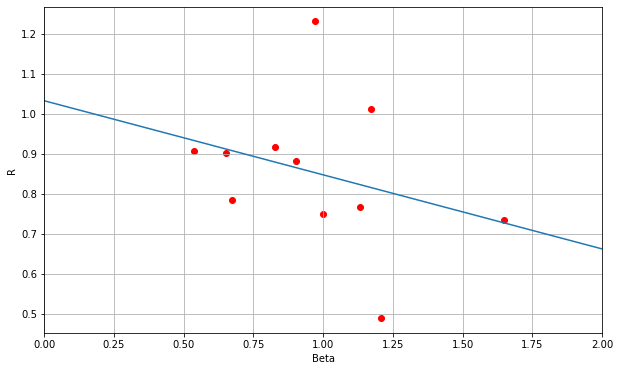

In [9]:
#ploting SML and positions of portfolios
tempy = 2 * tempSlope + tempIntercept
smlx = [0, 2]
smly = [tempIntercept,tempy]
plt.figure(figsize = (10, 6))
plt.plot(smlx,smly)

plt.scatter(tempRegSeries, meanReturn, color = 'red')

#Making the graph more presentable
plt.xlabel("Beta")
plt.ylabel("R")
axes = plt.gca()
axes.set_xlim([0,2])
plt.axes()
plt.grid()

***Q: Briefly explain the economic significance of the SML***

<u>Answer</u><br>
The SML shows investors all possible combinations of n risky assets and riskless asset in the financial market. The slope of the SML represents the ratio of risk return to beta (also known as the Treynor ratio). And lastly, in the long run, investors will only trade assets on the SML as overpriced or underpriced assets will eventually fall back to equilibrium on the SML through demand and supply of the assets